<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/My_Second__Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np




In [5]:
def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
     Path("datasets").mkdir(parents=True, exist_ok=True)
     url = "http://github.com/ageron/data/raw/main/housing.tgz"
     urllib.request.urlretrieve(url, tarball_path)
     with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
      return pd.read_csv(Path("datasets/housing/housing.csv"))

      housing = load_housing_data()

In [6]:
housing = load_housing_data()

In [7]:
housing.info


<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]>

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


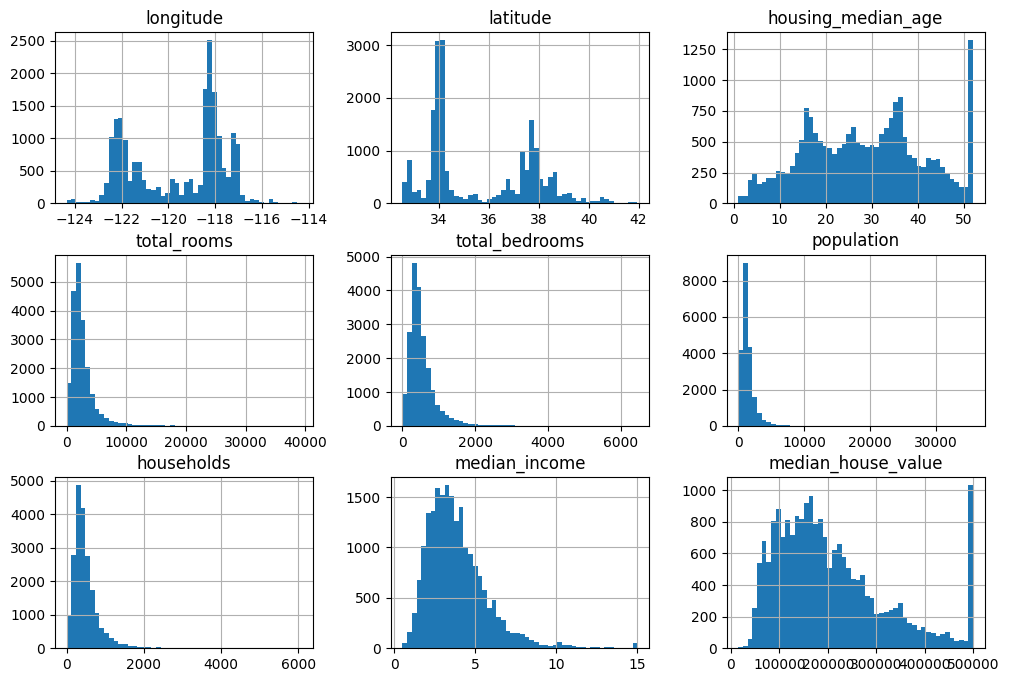

In [11]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))

plt.show()


In [12]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
      shuffled_indices = np.random.permutation(len(data))
      test_set_size = int(len(data)* test_ratio)
      test_indices = shuffled_indices[:test_set_size]
      train_indices = shuffled_indices[test_set_size:]
      return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffle_and_split_data(housing,0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
from zlib import crc32

In [16]:
def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio *2**32

In [17]:
def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

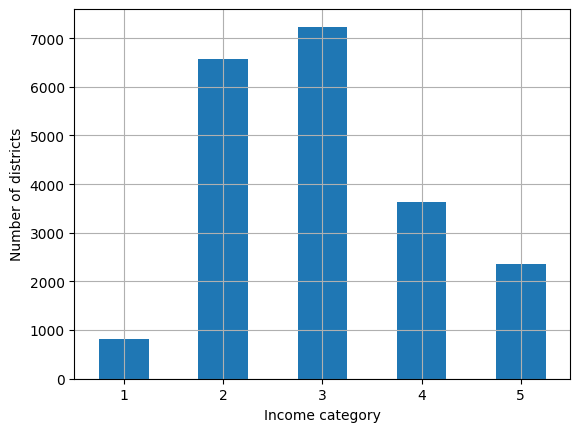

In [21]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for  train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])
    strat_train_set, strat_test_set = strat_splits[0]


# A way to get a single split using the train_split() function with the stratify argument:

In [24]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

# Looking at the income category


      

In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [26]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [27]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

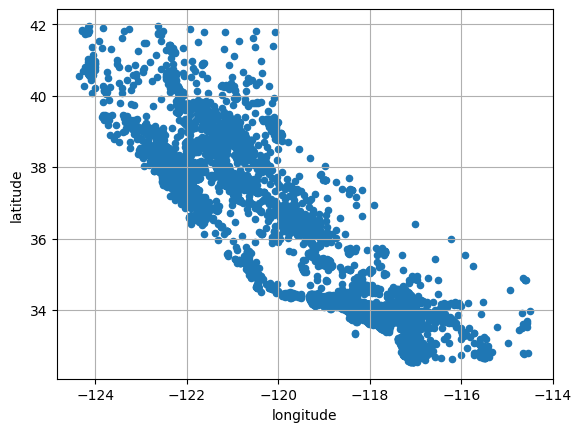

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)

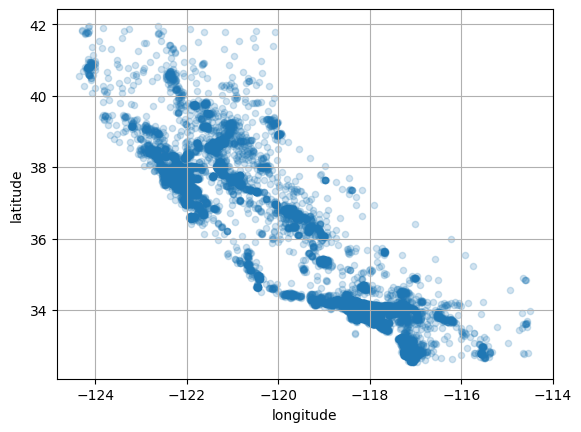

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

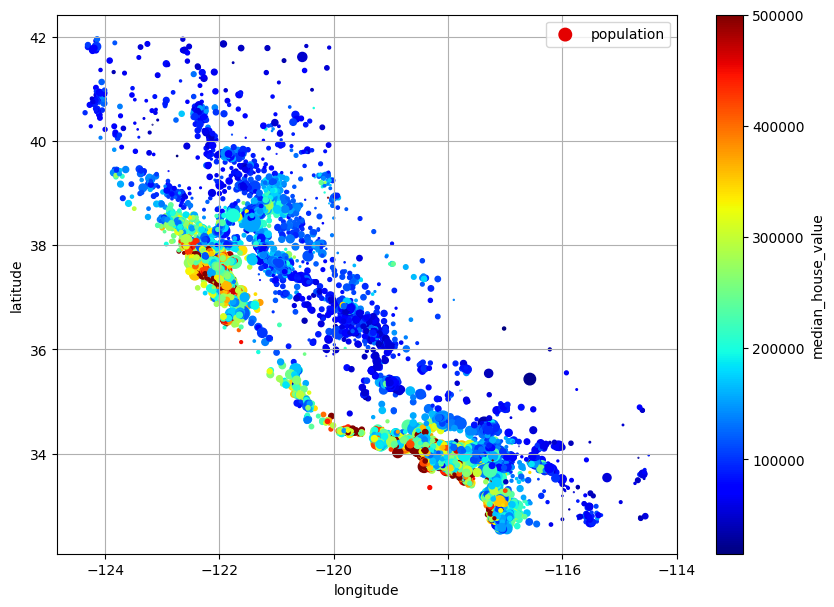

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

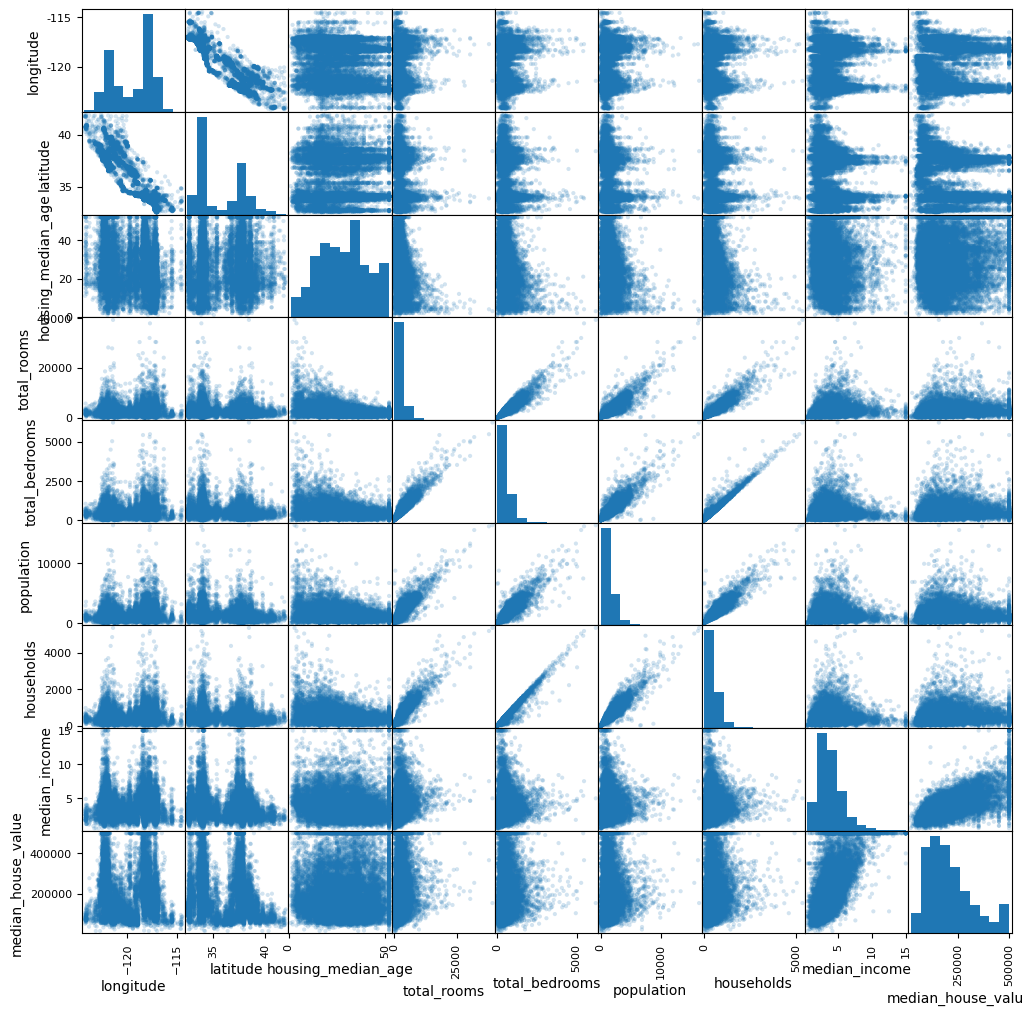

In [31]:
pd.plotting.scatter_matrix(housing.select_dtypes(include=[np.number]), figsize=(12, 12), alpha=0.2)
plt.show()


In [32]:
import seaborn as sns

In [33]:
housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"])

In [34]:
housing["ocean_proximity"] = pd.to_numeric(housing["ocean_proximity"], errors='coerce')

In [35]:
housing["ocean_proximity"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ocean_proximity, dtype: float64

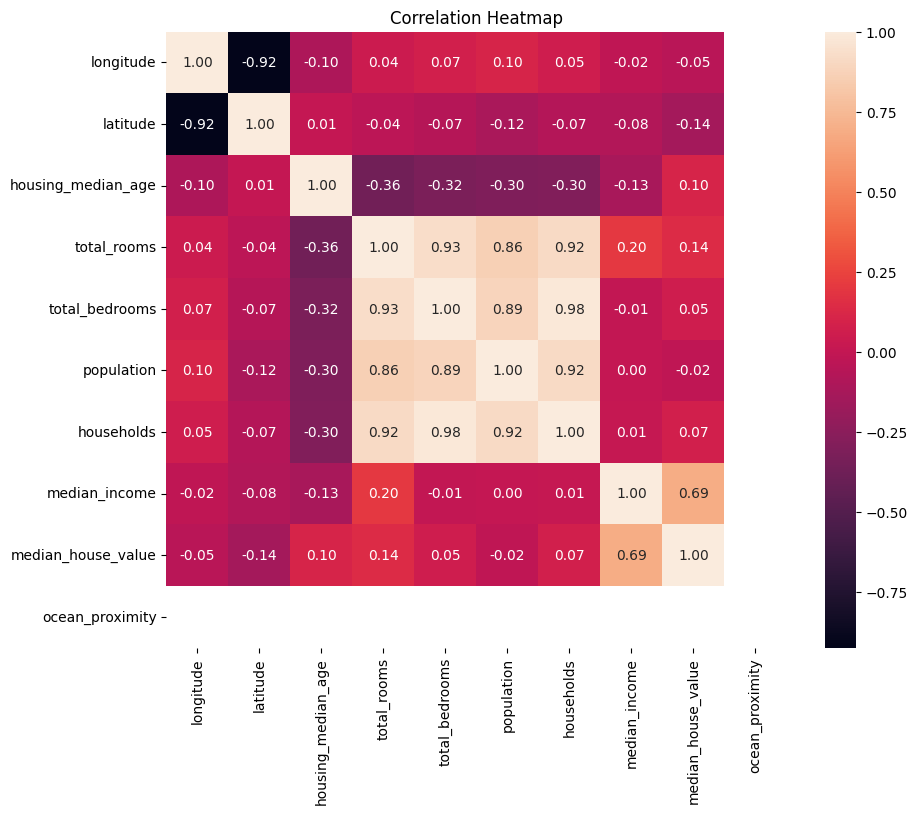

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

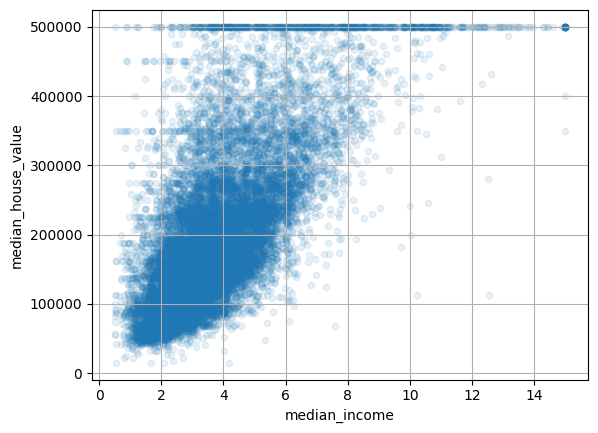

In [37]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [39]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [40]:
corr_matrix = housing.corr()

In [41]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
ocean_proximity            NaN
Name: median_house_value, dtype: float64

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#Clean the Data

Machine learning algorithms can not work with missing features,
total_bedrooms has missing features.
- Get rid of the corresponding districts.
- Get rid of the whole attribute
- Set the missing values to some value(zero, the mean, the median, etc).This is called imputation


In [43]:
housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1

In [44]:
housing.drop("total_bedrooms", axis=1) # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,1725.0,838.0,4.1455,<1H OCEAN


In [46]:
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

#Go with option 3
The benefit  is that it will store the median value features: this will make it possible to impute missing values not only the training set but also validation set the test set and any new data fed in the model
SimpleImputer instance, specifying that you want to replace each attribute's missing values with median of that attribute:

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
imputer = SimpleImputer(strategy="median")

#Median can only be computed on numerical attributes
We need to create a copy of the data with numerical attribues (this will exclude the text attribute ocean_proximity

In [49]:
housing_num = housing.select_dtypes(include=[np.number])

In [50]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

# The imputer has simply computed the median of each attribute and stored the results in its statistics_instance variable.Only the total_bedrooms attribute had missing values but to be sure and safe, its best to apply the Imputer to all the numerical attributes


In [52]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [53]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [54]:
X = imputer.transform(housing_num)

In [56]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [57]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


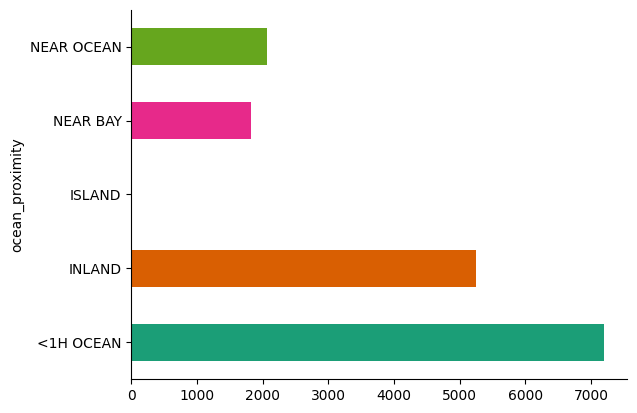

In [58]:
# @title ocean_proximity

from matplotlib import pyplot as plt
import seaborn as sns
housing_cat.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [59]:
from sklearn.preprocessing import OrdinalEncoder

In [61]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [62]:
housing_cat_1hot

<16344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16344 stored elements in Compressed Sparse Row format>

In [63]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})

In [66]:
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [67]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [68]:
df_test_unknown = pd.DataFrame({"ocean_proximity" : ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [69]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [73]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [87]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

### As with all estimators. It is important to fit the scalers to the training data only. never use fit() or fit_transform() for anyting else than training set.once you have a trained scaler, you can then use it to transform() any other set, including the validation set, the test set and new data.If any outliers it affects the scale and end up scaled outside the range.If you want to avoid this then just set the clip hyperparameter to True

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [91]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
